In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

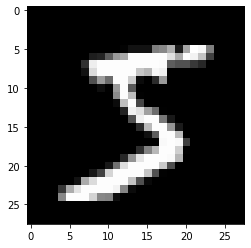

In [4]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [5]:
#model 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(10,activation='softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
hist = model.fit(X_train,y_train,
                 validation_data=(X_test,y_test),
                epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.2949 - accuracy: 0.9142 - val_loss: 0.1396 - val_accuracy: 0.9584
Epoch 2/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1407 - accuracy: 0.9579 - val_loss: 0.0956 - val_accuracy: 0.9720
Epoch 3/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1056 - accuracy: 0.9683 - val_loss: 0.0858 - val_accuracy: 0.9740
Epoch 4/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0769 - val_accuracy: 0.9760
Epoch 5/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0739 - accuracy: 0.9764 - val_loss: 0.0755 - val_accuracy: 0.9760
Epoch 6/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0645 - accuracy: 0.9789 - val_loss: 0.0694 - val_accuracy: 0.9791
Epoch 7/10
60000/60000 [====================

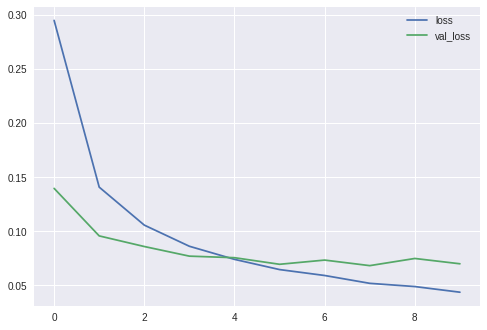

In [9]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

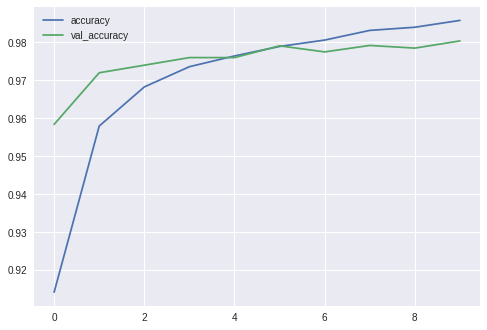

In [10]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test,y_test,verbose=0)

[0.06986110110840528, 0.9804]

In [36]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [37]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='CM',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized")
    else:
        print("Not normalized")
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh=cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,format(cm[i, j], fmt),
                horizontalalignment = 'center',
                color="white" if cm[i, j]>thresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    

    
    

In [29]:
p_test = model.predict(X_test).argmax(axis=1)

Not normalized
[[ 967    0    1    2    1    1    1    2    3    2]
 [   0 1128    2    0    0    0    1    0    4    0]
 [   3    2 1007    3    3    1    2    3    8    0]
 [   1    0    4  990    0    6    0    4    3    2]
 [   2    0    1    0  956    0    5    5    2   11]
 [   2    0    0    9    2  868    3    1    3    4]
 [   1    3    1    1    3    3  944    0    2    0]
 [   1    2    4    2    0    0    0 1014    3    2]
 [   5    0    3    4    4    0    3    4  947    4]
 [   1    2    0    3    7    4    1    6    2  983]]


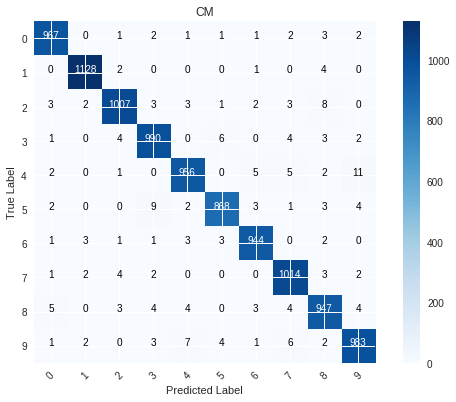

In [38]:
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [40]:
import seaborn as sns

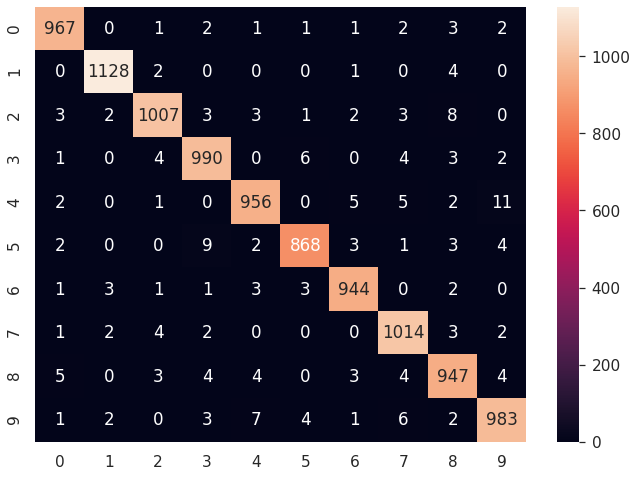

In [47]:

sns.set(font_scale=1.4, rc={'figure.figsize':(11,8)})
sns.heatmap(cm,annot=True,fmt='d')

In [51]:
missclass = np.where(p_test != y_test)[0]

In [55]:
idx = np.random.choice(missclass)

9 5


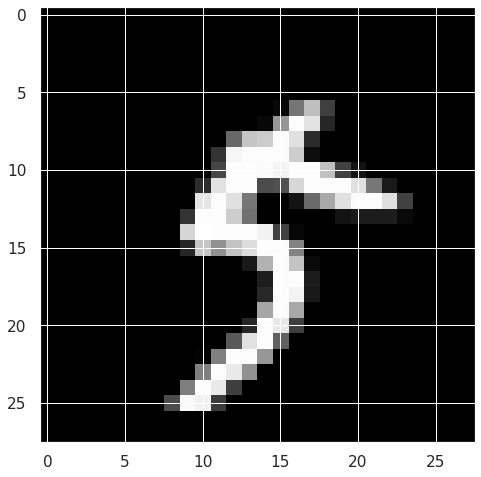

In [56]:
print(p_test[idx],y_test[idx])
plt.imshow(X_test[idx],cmap='gray')
plt.show()